### Import Libraray

In [1]:
import os
import cv2
import glob
import shutil
import warnings
import matplotlib.pyplot as plt
import numpy as np

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
# 현재 실행 파일 경로 확인
os.getcwd()

'/Users/jiwonchoi/comento/1'

### yolov5s 모델 설치 및 환경 설정

- 모델을 설치할 경로에 cd 명령어를 활용하여 들어가주세요

In [4]:
cd /Users/jiwonchoi/comento/1

/Users/jiwonchoi/comento/1


In [5]:
# 현재 파일 경로 확인 (원하는 경로에 들어와있는지 확인)
os.getcwd()

'/Users/jiwonchoi/comento/1'

In [ ]:
# git clone을 통해 yolov5s 모델 설치
!git clone https://github.com/ultralytics/yolov5.git #yolov5 git 주소

'yolov5'에 복제합니다...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
오브젝트를 받는 중: 100% (17265/17265), 16.11 MiB | 9.44 MiB/s, 완료.
델타를 알아내는 중: 100% (11858/11858), 완료.


### yolov5s 전이학습
- 전이학습을 진행할 때 사용되는 batch와 epoch에 대해서 정의도 같이 공부하면 좋을 것 같습니다.
- 전이학습 후에 나오는 최종모델파일은 마지막줄에 출력되는 "Results saved to yolov5/runs/train/yolov5s_results" 에 저장됩니다.

In [7]:
#!pip install --upgrade Pillow

In [8]:
#!pip install torch torchvision torchaudio

In [9]:
import timeit
start = timeit.default_timer()
!python yolov5/train.py --img 224 --batch 20 --epochs 40 --data /Users/jiwonchoi/comento/1/datasets/cardata.yaml --cfg yolov5/models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results
end = timeit.default_timer()
print("모델 전이 학습에 걸린 시간: ",end-start)

train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=/Users/jiwonchoi/comento/1/datasets/cardata.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=20, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.9.18 torch-2.5.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mome

### 전이학습 결과 확인
- 1주차 과제에서 생성한 testdataset을 기반으로 모델 성능을 평가합니다.

P (Precision): 정밀도           
R (Recall): 재현율          
[email protected]: mAP (IoU=0.5)            
[email protected]:0.95: mAP (IoU=0.5~0.95)          

In [ ]:
!python yolov5/val.py --img 224 --batch 60 --data /Users/jiwonchoi/comento/1/datasets/cardata.yaml --weights /Users/jiwonchoi/comento/1/yolov5/runs/train/yolov5s_results/weights/best.pt --project yolov5/runs/my_val --name custom_val_results

val: data=/Users/jiwonchoi/comento/1/datasets/cardata.yaml, weights=['/Users/jiwonchoi/comento/1/yolov5/runs/train/yolov5s_results/weights/best.pt'], batch_size=60, imgsz=224, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/my_val, name=custom_val_results, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.9.18 torch-2.5.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /Users/jiwonchoi/comento/1/datasets/labels/val.cache... 64 images,
                 Class     Images  Instances          P          R      mAP50   
                   all        309        172      0.213          1      0.251      0.234
Speed: 0.3ms pre-process, 45.3ms inference, 0.3ms NMS per image at shape (60, 3, 224, 224)
Results saved to yolov5/runs/my_val/custom_val_

### 성능 지표 시각화 
**  /Users/jiwonchoi/comento/1/yolov5/runs/train/yolov5s_results2  **

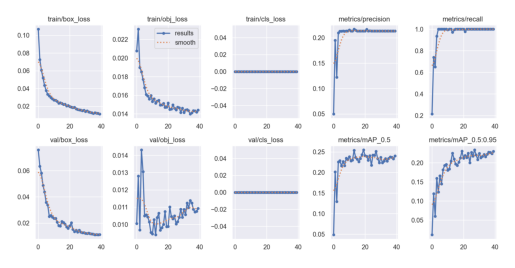

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 결과 이미지 파일 경로
result = "/Users/jiwonchoi/comento/1/yolov5/runs/train/yolov5s_results/results.png"

# 이미지 읽기 및 표시
img = mpimg.imread(result)
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()


### 추론(inference) 진행
- 학습에 사용되지 않은 이미지를 한 장씩 넣어서 추론 결과 확인해보기
- 추론 속도와 추론 결과 이미지 확인

In [ ]:
# 필요할 경우 설치
!pip install ultralytics

In [13]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# 학습한 모델 불러오기
model = torch.hub.load('yolov5', 'custom', path='/Users/jiwonchoi/comento/1/yolov5/runs/train/yolov5s_results/weights/best.pt', source='local')
model.conf = 0.5

YOLOv5 🚀 v7.0-397-gde62f93c Python-3.9.18 torch-2.5.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [15]:
# 추론을 진행할 이미지 불러오기
test_img_path = '/Users/jiwonchoi/comento/1/test.png'
img = Image.open(test_img_path)

In [16]:
# 추론 진행

results = model(img, size=224)

In [ ]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x768 2 cars
Speed: 14.7ms pre-process, 15.7ms inference, 0.8ms NMS per image at shape (1, 3, 160, 224)

         xmin        ymin        xmax        ymax  confidence  class name
0  380.925812  184.107788  474.726166  272.033630    0.537277      0  car
1  403.935577  323.343781  532.502258  451.678192    0.536347      0  car


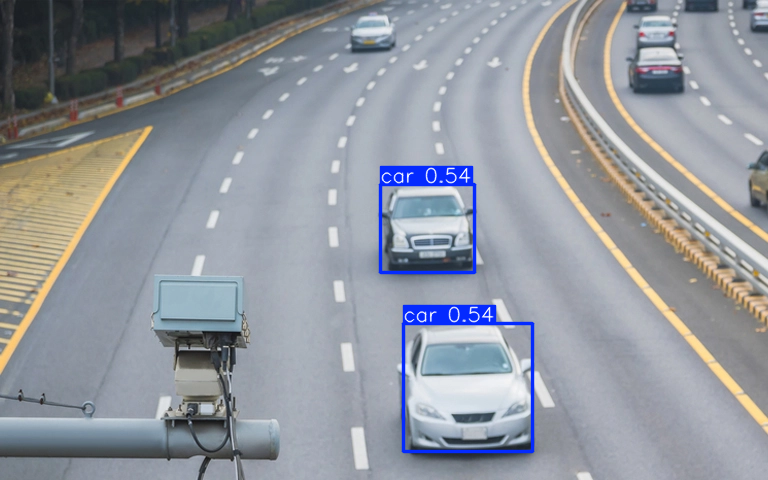

In [ ]:
# 추론 결과 확인하기

print(results.pandas().xyxy[0])

# Save or display results
results.show()
plt.imshow(results.render()[0])
plt.axis('off')
plt.show()

### yolov8n 전이학습

In [ ]:
from ultralytics import YOLO
# YOLOv8 모델 불러오기
model8 = YOLO("yolov8n.pt")  # 사전 학습된 모델 로드

# 전이 학습 실행
model8.train(
    data="/Users/jiwonchoi/comento/1/datasets/cardata.yaml",  # 데이터셋 경로
    epochs=40,  # 학습 에포크
    imgsz=224,  # 이미지 크기
    batch=20,  # 배치 크기
    name="/Users/jiwonchoi/comento/1/yolov8n_results"  # 결과 저장 디렉토리 이름
)

New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.58 🚀 Python-3.9.18 torch-2.5.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/jiwonchoi/comento/1/datasets/cardata.yaml, epochs=40, time=None, patience=100, batch=20, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_results, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

train: Scanning /Users/jiwonchoi/comento/1/datasets/labels/train... 550 images, 374 backgrounds, 0 corrupt: 100%|██████████| 924/924 [00:01<00:00, 772.41it/s]

train: New cache created: /Users/jiwonchoi/comento/1/datasets/labels/train.cache



val: Scanning /Users/jiwonchoi/comento/1/datasets/labels/val... 64 images, 245 backgrounds, 0 corrupt: 100%|██████████| 309/309 [00:00<00:00, 855.51it/s]

val: New cache created: /Users/jiwonchoi/comento/1/datasets/labels/val.cache
Plotting labels to /Users/jiwonchoi/comento/1/yolov8n_results/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to /Users/jiwonchoi/comento/1/yolov8n_results
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40         0G     0.9653      1.844     0.9133         15        224: 100%|██████████| 47/47 [01:29<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.37s/it]

                   all        309        172      0.191      0.488      0.218      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40         0G     0.7211      1.033     0.8531          6        224: 100%|██████████| 47/47 [01:31<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.35s/it]

                   all        309        172      0.212      0.994      0.219      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40         0G     0.6697     0.9662     0.8413         15        224: 100%|██████████| 47/47 [01:30<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]

                   all        309        172      0.215      0.983      0.228      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40         0G     0.6488     0.9469     0.8404         14        224: 100%|██████████| 47/47 [01:30<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.215          1      0.238      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40         0G     0.6121      0.892     0.8343         18        224: 100%|██████████| 47/47 [01:29<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        309        172      0.213          1      0.223      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40         0G     0.6029     0.8697     0.8299         14        224: 100%|██████████| 47/47 [01:27<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.28s/it]

                   all        309        172      0.213          1      0.224      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40         0G     0.5611     0.8564      0.821         12        224: 100%|██████████| 47/47 [01:38<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.35s/it]

                   all        309        172      0.213          1      0.231       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40         0G      0.519     0.8189     0.8174          4        224: 100%|██████████| 47/47 [01:29<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:20<00:00,  2.55s/it]

                   all        309        172      0.213          1      0.225      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40         0G     0.5375      0.834     0.8215         16        224: 100%|██████████| 47/47 [01:33<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.37s/it]

                   all        309        172      0.213          1      0.222      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40         0G     0.5155      0.831     0.8154         10        224: 100%|██████████| 47/47 [01:28<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.212      0.977       0.24      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40         0G     0.5133     0.7871     0.8179          8        224: 100%|██████████| 47/47 [01:37<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.35s/it]

                   all        309        172      0.213          1      0.226      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40         0G     0.5029     0.8107     0.8151          6        224: 100%|██████████| 47/47 [01:34<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        309        172      0.213          1      0.232      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40         0G     0.4846     0.7712     0.8161         11        224: 100%|██████████| 47/47 [01:28<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]

                   all        309        172      0.213          1      0.226      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40         0G     0.4723      0.805     0.8106         12        224: 100%|██████████| 47/47 [01:29<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.42s/it]

                   all        309        172      0.213          1      0.219      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40         0G     0.4514      0.794     0.8104         13        224: 100%|██████████| 47/47 [01:38<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.213          1      0.219      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40         0G     0.4556     0.7716     0.8093         11        224: 100%|██████████| 47/47 [01:27<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.28s/it]

                   all        309        172      0.213          1      0.231      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40         0G     0.4713     0.7683     0.8084         15        224: 100%|██████████| 47/47 [01:26<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.213          1       0.23      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40         0G      0.432     0.7721     0.7991          7        224: 100%|██████████| 47/47 [01:29<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.40s/it]

                   all        309        172      0.213          1      0.239       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40         0G     0.4381     0.7334     0.8057         20        224: 100%|██████████| 47/47 [01:28<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.28s/it]

                   all        309        172      0.213          1      0.228      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40         0G     0.4276     0.7344     0.8057          9        224: 100%|██████████| 47/47 [01:27<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.239      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40         0G      0.425     0.7509     0.8005         17        224: 100%|██████████| 47/47 [01:42<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.37s/it]

                   all        309        172      0.213          1      0.238       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40         0G     0.4182     0.7789     0.8012          8        224: 100%|██████████| 47/47 [01:28<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]

                   all        309        172      0.214          1      0.249      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40         0G     0.4066     0.7179     0.8003          9        224: 100%|██████████| 47/47 [01:27<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.233      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40         0G      0.416     0.7276     0.8051         18        224: 100%|██████████| 47/47 [01:27<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.213          1      0.224      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40         0G     0.4039     0.7271     0.8041          7        224: 100%|██████████| 47/47 [01:27<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.213          1      0.243      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40         0G     0.4028     0.7543     0.7985         18        224: 100%|██████████| 47/47 [01:27<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]

                   all        309        172      0.213          1      0.254      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40         0G     0.3977     0.6907     0.7947         16        224: 100%|██████████| 47/47 [01:26<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.213          1      0.241      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40         0G     0.3959     0.7282     0.8011          9        224: 100%|██████████| 47/47 [01:27<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.241      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40         0G     0.3911     0.7133     0.8035         14        224: 100%|██████████| 47/47 [01:28<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.237      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40         0G     0.3744     0.7193     0.7933         10        224: 100%|██████████| 47/47 [01:27<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]

                   all        309        172      0.213          1      0.242      0.235


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40         0G     0.3288     0.7317     0.7723          8        224: 100%|██████████| 47/47 [01:26<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.216      0.988       0.26       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40         0G     0.3174     0.7376     0.7747          9        224: 100%|██████████| 47/47 [01:28<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]

                   all        309        172      0.213          1      0.233      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40         0G     0.3123     0.7288      0.776          7        224: 100%|██████████| 47/47 [01:27<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]

                   all        309        172      0.214          1      0.231      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40         0G      0.313      0.738     0.7804          5        224: 100%|██████████| 47/47 [01:29<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]

                   all        309        172      0.213          1       0.24      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40         0G     0.3085     0.7108     0.7728          7        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.35s/it]

                   all        309        172      0.214          1      0.257       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40         0G     0.2977     0.7091     0.7729          4        224: 100%|██████████| 47/47 [01:33<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.235       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40         0G     0.2875     0.7957     0.7758          1        224: 100%|██████████| 47/47 [01:33<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        309        172      0.213          1      0.235      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40         0G     0.2802     0.6888     0.7664          8        224: 100%|██████████| 47/47 [01:30<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]

                   all        309        172      0.213          1      0.231      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40         0G     0.2847     0.6959     0.7689          8        224: 100%|██████████| 47/47 [01:26<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.27s/it]

                   all        309        172      0.213          1      0.231      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40         0G     0.2732     0.6882     0.7679          5        224: 100%|██████████| 47/47 [01:25<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.213          1      0.234       0.23



40 epochs completed in 1.214 hours.
Optimizer stripped from /Users/jiwonchoi/comento/1/yolov8n_results/weights/last.pt, 6.2MB
Optimizer stripped from /Users/jiwonchoi/comento/1/yolov8n_results/weights/best.pt, 6.2MB

Validating /Users/jiwonchoi/comento/1/yolov8n_results/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.9.18 torch-2.5.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.28s/it]


                   all        309        172      0.214          1      0.258      0.251
Speed: 0.1ms preprocess, 17.9ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /Users/jiwonchoi/comento/1/yolov8n_results


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x350bdfb80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

In [ ]:
# 성능 평가
model=YOLO("/Users/jiwonchoi/comento/1/yolov8n_results/weights/best.pt")
metrics = model.val(
    data="/Users/jiwonchoi/comento/1/datasets/cardata.yaml",  # 데이터셋 설정 파일
    imgsz=224,  # 이미지 크기
    batch=60    # 배치 크기
)
    
# 주요 성능 지표 출력
metrics.results_dict

Ultralytics 8.3.58 🚀 Python-3.9.18 torch-2.5.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/jiwonchoi/comento/1/datasets/labels/val.cache... 64 images, 245 backgrounds, 0 corrupt: 100%|██████████| 309/309 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:17<00:00,  2.95s/it]


                   all        309        172      0.214          1      0.258      0.251
Speed: 0.1ms preprocess, 15.8ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /opt/homebrew/runs/detect/val5


{'metrics/precision(B)': 0.21364740182387432,
 'metrics/recall(B)': 1.0,
 'metrics/mAP50(B)': 0.2578441874994239,
 'metrics/mAP50-95(B)': 0.2508139045979716,
 'fitness': 0.25151693288811683}

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 결과 이미지 파일 경로
result8 = "/Users/jiwonchoi/comento/1/yolov8n_results/results.png"

# 이미지 읽기 및 표시
img8 = mpimg.imread(result8)
plt.show()

In [24]:
from PIL import Image
import numpy as np

def run_inference(image_path):
    """ 이미지 파일에 YOLOv8 추론을 실행

    Args:
        image_path (str): 추론할 이미지 경로

    Returns:
        result_image (numpy.ndarray): 추론 결과가 시각화된 이미지
        detections (list): 객체 탐지 결과 리스트
    """
    # 이미지 로드
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image)

    # 모델 추론
    results = model(image_array)

    # 추론 결과 파싱
    detections = []
    for box in results[0].boxes:
        xmin, ymin, xmax, ymax = box.xyxy[0]
        confidence = box.conf[0]
        cls = int(box.cls[0])
        detections.append({
            "x1": int(xmin),
            "y1": int(ymin),
            "x2": int(xmax),
            "y2": int(ymax),
            "confidence": float(confidence),
            "class": cls,
            "name": model.names[cls]
        })

    # 이미지 시각화
    annotated_image = results[0].plot()
    return annotated_image, detections

In [ ]:
# 모델 추론
annotated_image, detections = run_inference("/Users/jiwonchoi/comento/1/test.png")


0: 160x224 2 cars, 22.4ms
Speed: 2.0ms preprocess, 22.4ms inference, 0.7ms postprocess per image at shape (1, 3, 160, 224)


결과 확인: 
[{'x1': 396, 'y1': 319, 'x2': 533, 'y2': 454, 'confidence': 0.5174999237060547, 'class': 0, 'name': 'car'}, {'x1': 384, 'y1': 126, 'x2': 474, 'y2': 271, 'confidence': 0.3074376881122589, 'class': 0, 'name': 'car'}]
탐지된 이미지 확인


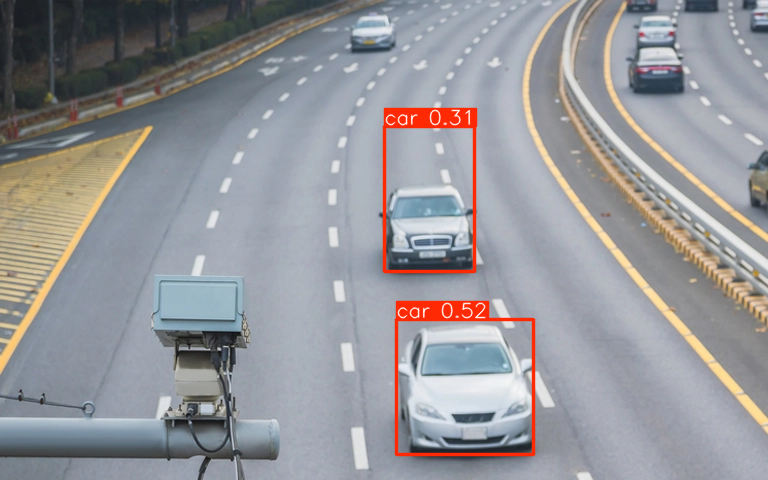

In [ ]:
print("결과 확인: ")
print(detections)
print("탐지된 이미지 확인")
Image.fromarray(annotated_image)

## yolo11n

In [28]:
model = YOLO("yolo11n.pt")  # "yolo11n.pt" 파일 경로에 맞게 수정하세요.
# 모델 학습
results = model.train(
    data="/Users/jiwonchoi/comento/1/datasets/cardata.yaml",  # 데이터셋 경로
    epochs=40,          # 학습 반복 횟수
    imgsz=224,          # 이미지 크기
    batch=20,           # 배치 크기
    name="/Users/jiwonchoi/comento/1/yolov11n_results"  # 결과 저장 디렉토리 이름
)

New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.58 🚀 Python-3.9.18 torch-2.5.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/Users/jiwonchoi/comento/1/datasets/cardata.yaml, epochs=40, time=None, patience=100, batch=20, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov11n_results2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning /Users/jiwonchoi/comento/1/datasets/labels/train.cache... 550 images, 374 backgrounds, 0 corrupt: 100%|██████████| 924/924 [00:00<?, ?it/s]
val: Scanning /Users/jiwonchoi/comento/1/datasets/labels/val.cache... 64 images, 245 backgrounds, 0 corrupt: 100%|██████████| 309/309 [00:00<?, ?it/s]

Plotting labels to /Users/jiwonchoi/comento/1/yolov11n_results2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to /Users/jiwonchoi/comento/1/yolov11n_results2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40         0G     0.9663      2.134     0.9112         15        224: 100%|██████████| 47/47 [01:38<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]

                   all        309        172    0.00349          1     0.0966     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40         0G     0.7309      1.074     0.8545          6        224: 100%|██████████| 47/47 [01:37<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.221      0.581      0.244      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40         0G      0.682     0.9937     0.8413         15        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.213          1      0.243      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40         0G      0.663     0.9729     0.8432         14        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.215          1       0.23      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40         0G     0.6238     0.9214     0.8346         18        224: 100%|██████████| 47/47 [01:36<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]

                   all        309        172      0.214          1      0.223        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40         0G     0.5829     0.9029      0.827         14        224: 100%|██████████| 47/47 [01:36<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        309        172      0.213          1      0.235      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40         0G     0.5662     0.8962     0.8208         12        224: 100%|██████████| 47/47 [01:35<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.217      0.983      0.226      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40         0G     0.5323     0.8491     0.8188          4        224: 100%|██████████| 47/47 [01:37<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]

                   all        309        172      0.213          1      0.221        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40         0G     0.5351     0.8608     0.8197         16        224: 100%|██████████| 47/47 [01:37<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        309        172      0.213          1      0.222      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40         0G     0.5207     0.8502     0.8158         10        224: 100%|██████████| 47/47 [01:36<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        309        172      0.213          1      0.238       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40         0G     0.5107     0.8056     0.8167          8        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.233      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40         0G     0.5083     0.8328     0.8152          6        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.229      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40         0G     0.4858      0.785     0.8141         11        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1       0.23      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40         0G     0.4898     0.8128      0.814         12        224: 100%|██████████| 47/47 [01:40<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.37s/it]

                   all        309        172      0.213          1      0.234      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40         0G     0.4677     0.8007     0.8118         13        224: 100%|██████████| 47/47 [01:43<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]

                   all        309        172      0.213          1      0.234      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40         0G     0.4616     0.7808      0.811         11        224: 100%|██████████| 47/47 [01:45<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.44s/it]

                   all        309        172      0.213          1      0.217      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40         0G      0.472     0.7746     0.8093         15        224: 100%|██████████| 47/47 [01:44<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.40s/it]

                   all        309        172      0.213          1      0.222       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40         0G     0.4408      0.783     0.7982          7        224: 100%|██████████| 47/47 [01:40<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        309        172      0.213          1      0.253      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40         0G     0.4428     0.7468     0.8053         20        224: 100%|██████████| 47/47 [01:37<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.237      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40         0G     0.4394     0.7456     0.8058          9        224: 100%|██████████| 47/47 [01:35<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213      0.996      0.242      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40         0G     0.4315     0.7581     0.8027         17        224: 100%|██████████| 47/47 [01:35<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

                   all        309        172      0.213          1      0.231      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40         0G     0.4211     0.7813     0.8008          8        224: 100%|██████████| 47/47 [01:35<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.234      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40         0G      0.411      0.724     0.8001          9        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1       0.23      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40         0G     0.4238     0.7352     0.8039         18        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.234      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40         0G     0.4066     0.7363      0.803          7        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.238      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40         0G     0.4078     0.7643     0.7983         18        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.251      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40         0G     0.4065     0.7037     0.7951         16        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.228      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40         0G     0.3956     0.7335     0.8005          9        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.232      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40         0G     0.3837     0.7181     0.8023         14        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.231      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40         0G     0.3767     0.7242      0.794         10        224: 100%|██████████| 47/47 [01:35<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]

                   all        309        172      0.213          1      0.244      0.235


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40         0G      0.337     0.7372     0.7735          8        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.235      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40         0G     0.3253     0.7374     0.7745          9        224: 100%|██████████| 47/47 [01:34<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.238       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40         0G     0.3145     0.7226     0.7775          7        224: 100%|██████████| 47/47 [01:35<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.234      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40         0G     0.3166     0.7377     0.7813          5        224: 100%|██████████| 47/47 [01:35<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]

                   all        309        172      0.213          1      0.229      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40         0G     0.3054     0.7121     0.7726          7        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213          1      0.238      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40         0G     0.2877     0.7079     0.7723          4        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        309        172      0.213      0.999      0.243      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40         0G     0.2986     0.8219     0.7766          1        224: 100%|██████████| 47/47 [01:35<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.235      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40         0G     0.2805     0.6984     0.7661          8        224: 100%|██████████| 47/47 [01:35<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]

                   all        309        172      0.213          1      0.235      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40         0G     0.2916     0.6996     0.7696          8        224: 100%|██████████| 47/47 [01:35<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.241      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40         0G     0.2737     0.6951     0.7684          5        224: 100%|██████████| 47/47 [01:34<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        309        172      0.213          1      0.235       0.23



40 epochs completed in 1.286 hours.
Optimizer stripped from /Users/jiwonchoi/comento/1/yolov11n_results2/weights/last.pt, 5.4MB
Optimizer stripped from /Users/jiwonchoi/comento/1/yolov11n_results2/weights/best.pt, 5.4MB

Validating /Users/jiwonchoi/comento/1/yolov11n_results2/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.9.18 torch-2.5.1 CPU (Apple M1)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]


                   all        309        172      0.213          1      0.253      0.242
Speed: 0.1ms preprocess, 18.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /Users/jiwonchoi/comento/1/yolov11n_results2


In [30]:
# 성능 평가
model=YOLO("/Users/jiwonchoi/comento/1/yolov11n_results2/weights/best.pt")
metrics = model.val(
    data="/Users/jiwonchoi/comento/1/datasets/cardata.yaml",  # 데이터셋 설정 파일
    imgsz=224,  # 이미지 크기
    batch=60    # 배치 크기
)
    
# 주요 성능 지표 출력
metrics.results_dict

Ultralytics 8.3.58 🚀 Python-3.9.18 torch-2.5.1 CPU (Apple M1)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /Users/jiwonchoi/comento/1/datasets/labels/val.cache... 64 images, 245 backgrounds, 0 corrupt: 100%|██████████| 309/309 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:18<00:00,  3.06s/it]


                   all        309        172      0.213          1      0.253      0.242
Speed: 0.1ms preprocess, 17.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /opt/homebrew/runs/detect/val6


{'metrics/precision(B)': 0.21336946120675918,
 'metrics/recall(B)': 1.0,
 'metrics/mAP50(B)': 0.2532495704778414,
 'metrics/mAP50-95(B)': 0.24191047392832896,
 'fitness': 0.2430443835832802}

In [31]:
# 모델 추론
annotated_image, detections = run_inference("/Users/jiwonchoi/comento/1/test.png")


0: 160x224 5 cars, 10.8ms
Speed: 0.7ms preprocess, 10.8ms inference, 0.5ms postprocess per image at shape (1, 3, 160, 224)


결과 확인: 
[{'x1': 400, 'y1': 327, 'x2': 532, 'y2': 454, 'confidence': 0.5751156210899353, 'class': 0, 'name': 'car'}, {'x1': 382, 'y1': 182, 'x2': 475, 'y2': 271, 'confidence': 0.4608096778392792, 'class': 0, 'name': 'car'}, {'x1': 154, 'y1': 265, 'x2': 246, 'y2': 407, 'confidence': 0.3990997076034546, 'class': 0, 'name': 'car'}, {'x1': 748, 'y1': 132, 'x2': 768, 'y2': 219, 'confidence': 0.3907018303871155, 'class': 0, 'name': 'car'}, {'x1': 604, 'y1': 0, 'x2': 686, 'y2': 92, 'confidence': 0.25511008501052856, 'class': 0, 'name': 'car'}]
탐지된 이미지 확인


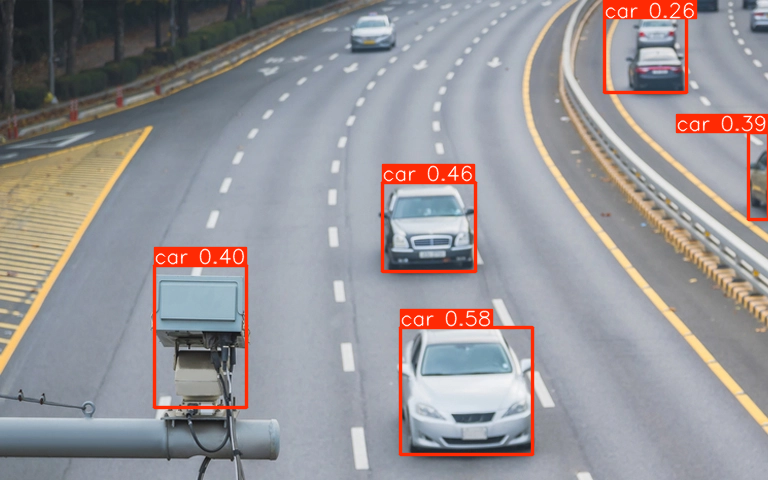

In [33]:
print("결과 확인: ")
print(detections)
print("탐지된 이미지 확인")
Image.fromarray(annotated_image)